In [1]:
# I got this code from Jay on kaggle, https://www.kaggle.com/code/jaykumar1607/brain-tumor-mri-classification-tensorflow-cnn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [3]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

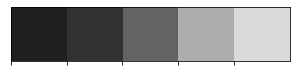

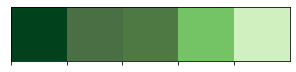

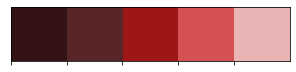

In [4]:
# I got this code from Jay on kaggle, https://www.kaggle.com/code/jaykumar1607/brain-tumor-mri-classification-tensorflow-cnn
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)
# this is making colors to use to visualize samples in just a bit

In [5]:
# I got this code from Jay on kaggle, https://www.kaggle.com/code/jaykumar1607/brain-tumor-mri-classification-tensorflow-cnn
# code comment is mine
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
# Making a labels list to use it for a for loop to pull out the data.

In [6]:
# I got this code from Jay on kaggle, https://www.kaggle.com/code/jaykumar1607/brain-tumor-mri-classification-tensorflow-cnn
# the code comments are mine
X_train = []
y_train = []
# making empty lists
image_size = 150
# making the image size we want to be 150, so the images will be 150x150
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Training',i)
    # this will give the path to each of the data folders inside of Training
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        # this is taking all the data and appending it to the X_train, and y_train lists we made.
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        # this is doing the same thing as the for loop above, but for the data under testing 
        # still appending it to the same training list, to put all the data together to run a train test split
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 78.28it/s]


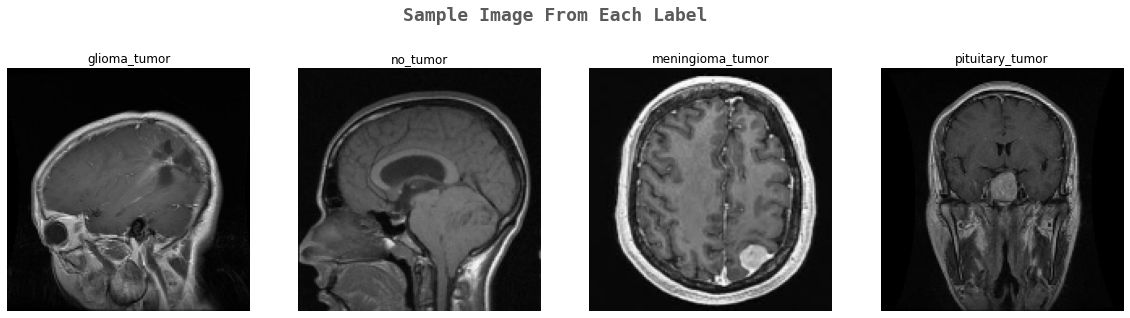

In [7]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1
# this is using the colors we made eariler to show some examples of each Label

In [8]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)
# shuffling the data so we can get a new split in our train set split

In [9]:
X_train[0].shape

(150, 150, 3)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

X_test, X_hold, y_test, y_hold = train_test_split(X_test, y_test, test_size=50, shuffle=False)

In [11]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
y_test

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [13]:
X_train[0].shape

(150, 150, 3)

In [14]:
df_train = pd.DataFrame(y_train)

In [15]:
y_train

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [16]:
df_train.sum()

0    833.0
1    449.0
2    841.0
3    814.0
dtype: float32

In [17]:
df_train['tumor'] = df_train[0] + df_train[2] + df_train[3]
df_train

,0,1,2,3,tumor
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
2932,0.0,0.0,1.0,0.0,1.0
2933,0.0,1.0,0.0,0.0,0.0
2934,0.0,0.0,1.0,0.0,1.0
2935,0.0,0.0,0.0,1.0,1.0


In [18]:
df_train = df_train.rename(columns = {1:'no_tumor'})

In [19]:
df_train

,0,no_tumor,2,3,tumor
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
2932,0.0,0.0,1.0,0.0,1.0
2933,0.0,1.0,0.0,0.0,0.0
2934,0.0,0.0,1.0,0.0,1.0
2935,0.0,0.0,0.0,1.0,1.0


In [20]:
df_train = df_train.drop(columns = [0,2,3])

In [21]:
df_train

,no_tumor,tumor
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
2932,0.0,1.0
2933,1.0,0.0
2934,0.0,1.0
2935,0.0,1.0


In [22]:
y_train = df_train.to_numpy()

In [23]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [24]:
y_test

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [25]:
df_test = pd.DataFrame(y_test)

In [26]:
df_test['tumor'] = df_test[0] + df_test[2] + df_test[3]
df_test

,0,1,2,3,tumor
0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
272,0.0,0.0,0.0,1.0,1.0
273,0.0,0.0,0.0,1.0,1.0
274,1.0,0.0,0.0,0.0,1.0
275,0.0,0.0,0.0,1.0,1.0


In [27]:
df_test = df_test.rename(columns = {1:'no_tumor'})
df_test

,0,no_tumor,2,3,tumor
0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
272,0.0,0.0,0.0,1.0,1.0
273,0.0,0.0,0.0,1.0,1.0
274,1.0,0.0,0.0,0.0,1.0
275,0.0,0.0,0.0,1.0,1.0


In [28]:
df_test = df_test.drop(columns = [0,2,3])
df_test

,no_tumor,tumor
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
272,0.0,1.0
273,0.0,1.0
274,0.0,1.0
275,0.0,1.0


In [29]:
y_test = df_test.to_numpy()
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [30]:
# y_train2 = y_train[:, 0]
# y_train2

In [31]:
# y_test2 = y_test[:, 0]
# y_test2

In [32]:
pd.Series(y_train[:,1]).value_counts(normalize=True)

1.0    0.847123
0.0    0.152877
dtype: float64

## Frist Sh**** Model

In [33]:
model = Sequential(
    [
        keras.Input(shape=(150,150,3)),
        layers.Flatten(), # need to flatten our images to be one long array
        layers.Dense(64, activation="tanh"),
        layers.Dense(1, activation="sigmoid"),
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4320064   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,320,129
Trainable params: 4,320,129
Non-trainable params: 0
_________________________________________________________________


2022-08-04 14:34:48.352357: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [34]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
batch_size = 20
epochs = 50

# Fit our model (save output to a history variable)
history = model.fit(X_train, 
                    y_train[:,1], 
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_data=(X_test, y_test[:,1]),
                    callbacks=[es, mc])

2022-08-04 14:34:48.738151: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
147/147 [==============================] - 3s 16ms/step - loss: 0.4693 - accuracy: 0.8464 - val_loss: 0.4327 - val_accuracy: 0.8448

Epoch 00001: val_accuracy improved from -inf to 0.84477, saving model to best_model.h5
Epoch 2/50
147/147 [==============================] - 2s 15ms/step - loss: 0.4282 - accuracy: 0.8471 - val_loss: 0.4341 - val_accuracy: 0.8448

Epoch 00002: val_accuracy did not improve from 0.84477
Epoch 3/50
147/147 [==============================] - 2s 13ms/step - loss: 0.4292 - accuracy: 0.8471 - val_loss: 0.4317 - val_accuracy: 0.8448

Epoch 00003: val_accuracy did not improve from 0.84477
Epoch 4/50
147/147 [==============================] - 2s 14ms/step - loss: 0.4293 - accuracy: 0.8471 - val_loss: 0.4318 - val_accuracy: 0.8448

Epoch 00004: val_accuracy did not improve from 0.84477
Epoch 5/50
147/147 [==============================] - 2s 13ms/step - loss: 0.4285 - accuracy: 0.8471 - val_loss: 0.4334 - val_accuracy: 0.8448

Epoch 00005: val_accuracy di

In [36]:
score = model.evaluate(X_test, y_test[:,1], verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4334394335746765
Test accuracy: 0.8447653651237488


In [37]:
# got this code from a lecture that was writtne by Lindsey, our instructor
def visualize_training_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

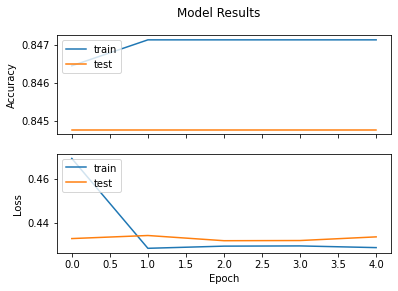

In [38]:
visualize_training_results(history)

#### (Visual Feedback)

## Second Model

In [39]:
model = Sequential(
    [
        keras.Input(shape=(150,150,3)),
        layers.Flatten(), # need to flatten our images to be one long array
        layers.Dense(64, activation="tanh"),
        layers.Dropout(0.1),
        layers.Dense(32, activation="tanh"),
        layers.Dropout(0.1),
        layers.Dense(16, activation="tanh"),
        layers.Dropout(0.1),
        layers.Dense(1, activation="sigmoid"),
    ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4320064   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)               

In [40]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
batch_size = 20
epochs = 25

# Fit our model (save output to a history variable)
history = model.fit(X_train, 
                    y_train[:,1], 
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_data=(X_test, y_test[:,1]),
                    callbacks=[es, mc])

Epoch 1/25
147/147 [==============================] - 3s 15ms/step - loss: 0.4402 - accuracy: 0.8441 - val_loss: 0.4328 - val_accuracy: 0.8448

Epoch 00001: val_accuracy did not improve from 0.84477
Epoch 2/25
147/147 [==============================] - 2s 14ms/step - loss: 0.4373 - accuracy: 0.8471 - val_loss: 0.4317 - val_accuracy: 0.8448

Epoch 00002: val_accuracy did not improve from 0.84477
Epoch 3/25
147/147 [==============================] - 2s 14ms/step - loss: 0.4353 - accuracy: 0.8471 - val_loss: 0.4319 - val_accuracy: 0.8448

Epoch 00003: val_accuracy did not improve from 0.84477
Epoch 4/25
147/147 [==============================] - 2s 14ms/step - loss: 0.4381 - accuracy: 0.8471 - val_loss: 0.4320 - val_accuracy: 0.8448

Epoch 00004: val_accuracy did not improve from 0.84477
Epoch 00004: early stopping


That didn't learn anything, it is just guess tumor everytime, so we gonna try cnn.

## CNN attempt with dropout layers

In [42]:
cnn = Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))

# now, to get the proper output
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn.add(layers.Dropout(0.1))
cnn.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
cnn.add(layers.Dropout(0.1))
cnn.add(layers.Dense(1, activation = 'sigmoid'))

cnn.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])

In [43]:
history = cnn.fit(X_train,
                  y_train[:,1],
                  epochs=50, 
                  batch_size=20,
                  validation_data=(X_test, y_test[:,1]),
                  callbacks=[es, mc])


Epoch 1/50
147/147 [==============================] - 147s 992ms/step - loss: 0.5155 - accuracy: 0.8434 - val_loss: 0.3107 - val_accuracy: 0.8484

Epoch 00001: val_accuracy improved from 0.84477 to 0.84838, saving model to best_model.h5
Epoch 2/50
147/147 [==============================] - 144s 981ms/step - loss: 0.2248 - accuracy: 0.8982 - val_loss: 0.2459 - val_accuracy: 0.8773

Epoch 00002: val_accuracy improved from 0.84838 to 0.87726, saving model to best_model.h5
Epoch 3/50
147/147 [==============================] - 144s 981ms/step - loss: 0.1897 - accuracy: 0.9135 - val_loss: 0.1775 - val_accuracy: 0.9097

Epoch 00003: val_accuracy improved from 0.87726 to 0.90975, saving model to best_model.h5
Epoch 4/50
147/147 [==============================] - 143s 976ms/step - loss: 0.1289 - accuracy: 0.9459 - val_loss: 0.2128 - val_accuracy: 0.9242

Epoch 00004: val_accuracy improved from 0.90975 to 0.92419, saving model to best_model.h5
Epoch 5/50
147/147 [==============================] 

In [44]:
score = cnn.evaluate(X_test, y_test[:,1], verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.18499460816383362
Test accuracy: 0.9277978539466858


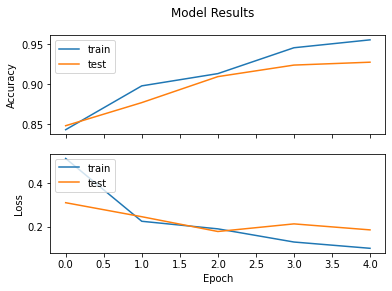

In [45]:
visualize_training_results(history)

### CNN model again, but instead of dropout, use kernel regularizer

In [46]:
from tensorflow.keras.regularizers import l2

In [47]:
cnn = Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))

# now, to get the proper output
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
cnn.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
cnn.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
cnn.add(layers.Dense(16, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
cnn.add(layers.Dense(1, activation = 'sigmoid'))

cnn.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])

In [48]:
history = cnn.fit(X_train, y_train[:,1],
                    epochs=100,
                    batch_size=100,
                    validation_data=(X_test, y_test[:,1]),
                    callbacks=[es, mc])

Epoch 1/100
30/30 [==============================] - 144s 5s/step - loss: 4.8445 - accuracy: 0.8107 - val_loss: 3.7679 - val_accuracy: 0.8845

Epoch 00001: val_accuracy did not improve from 0.92780
Epoch 2/100
30/30 [==============================] - 143s 5s/step - loss: 3.2957 - accuracy: 0.8904 - val_loss: 2.8526 - val_accuracy: 0.8989

Epoch 00002: val_accuracy did not improve from 0.92780
Epoch 3/100
30/30 [==============================] - 143s 5s/step - loss: 2.5513 - accuracy: 0.9019 - val_loss: 2.2734 - val_accuracy: 0.9061

Epoch 00003: val_accuracy did not improve from 0.92780
Epoch 4/100
30/30 [==============================] - 142s 5s/step - loss: 2.0152 - accuracy: 0.9414 - val_loss: 1.9452 - val_accuracy: 0.8989

Epoch 00004: val_accuracy did not improve from 0.92780
Epoch 5/100
30/30 [==============================] - 143s 5s/step - loss: 1.6655 - accuracy: 0.9537 - val_loss: 1.6380 - val_accuracy: 0.9386

Epoch 00005: val_accuracy improved from 0.92780 to 0.93863, savin

## Trying another model with just different layers

In [49]:
cnn = Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))

# now, to get the proper output
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
cnn.add(layers.Dense(16, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
cnn.add(layers.Dense(1, activation = 'sigmoid'))

cnn.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])

In [50]:
history = cnn.fit(X_train, y_train[:,1],
                    epochs=100,
                    batch_size=100,
                    validation_data=(X_test, y_test[:,1]),
                    callbacks=[es, mc])

Epoch 1/100
30/30 [==============================] - 142s 5s/step - loss: 3.2952 - accuracy: 0.7995 - val_loss: 1.2165 - val_accuracy: 0.8448

Epoch 00001: val_accuracy did not improve from 0.96390
Epoch 2/100
30/30 [==============================] - 141s 5s/step - loss: 1.0903 - accuracy: 0.8727 - val_loss: 0.9957 - val_accuracy: 0.9097

Epoch 00002: val_accuracy did not improve from 0.96390
Epoch 3/100
30/30 [==============================] - 141s 5s/step - loss: 0.9028 - accuracy: 0.9064 - val_loss: 0.8916 - val_accuracy: 0.8845

Epoch 00003: val_accuracy did not improve from 0.96390
Epoch 4/100
30/30 [==============================] - 141s 5s/step - loss: 0.7726 - accuracy: 0.9316 - val_loss: 0.7639 - val_accuracy: 0.9134

Epoch 00004: val_accuracy did not improve from 0.96390
Epoch 5/100
30/30 [==============================] - 143s 5s/step - loss: 0.6814 - accuracy: 0.9455 - val_loss: 0.7215 - val_accuracy: 0.9025

Epoch 00005: val_accuracy did not improve from 0.96390
Epoch 6/10

In [51]:
!ls

__notebook_source__.ipynb  best_model.h5


In [52]:
from keras.models import load_model

test = load_model('best_model.h5')

In [53]:
test.evaluate(X_test, y_test[:,1])

9/9 [==============================] - 4s 358ms/step - loss: 0.6034 - accuracy: 0.9639


[0.6034350395202637, 0.9638988971710205]

### Trying another model with different metrics

In [54]:
cnn = Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))

# now, to get the proper output
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
cnn.add(layers.Dense(16, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
cnn.add(layers.Dense(1, activation = 'sigmoid'))

cnn.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])

In [55]:
history = cnn.fit(X_train, y_train[:,1],
                    epochs=100,
                    batch_size=100,
                    validation_data=(X_test, y_test[:,1]),
                    callbacks=[es, mc])

Epoch 1/100
30/30 [==============================] - 53s 2s/step - loss: 1.5943 - accuracy: 0.8172 - val_loss: 1.1791 - val_accuracy: 0.8484

Epoch 00001: val_accuracy did not improve from 0.96390
Epoch 2/100
30/30 [==============================] - 52s 2s/step - loss: 1.0997 - accuracy: 0.8706 - val_loss: 1.0350 - val_accuracy: 0.8773

Epoch 00002: val_accuracy did not improve from 0.96390
Epoch 3/100
30/30 [==============================] - 53s 2s/step - loss: 0.9816 - accuracy: 0.8883 - val_loss: 0.9509 - val_accuracy: 0.8700

Epoch 00003: val_accuracy did not improve from 0.96390
Epoch 4/100
30/30 [==============================] - 52s 2s/step - loss: 0.8613 - accuracy: 0.9013 - val_loss: 0.8714 - val_accuracy: 0.8953

Epoch 00004: val_accuracy did not improve from 0.96390
Epoch 5/100
30/30 [==============================] - 51s 2s/step - loss: 0.7663 - accuracy: 0.9183 - val_loss: 0.8035 - val_accuracy: 0.8917

Epoch 00005: val_accuracy did not improve from 0.96390
Epoch 6/100
30/